In [1]:
# UCI Breast Cancer Dataset - SVM Model Training

## Table of Contents
1. Load Preprocessed Data
2. Train SVM Model
3. Evaluate Performance
4. Confusion Matrix & Classification Report
5. ROC Curve Analysis
6. Hyperparameter Tuning with Grid Search
7. Save Best Model
8. Make Predictions

SyntaxError: invalid syntax (366905394.py, line 4)

In [2]:
## 1. Import  Libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from time import time

# SVM and model selection
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix, 
    classification_report,
    roc_auc_score,
    roc_curve
)

import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("imported successfully")


imported successfully


In [4]:
## 2. Loading previously preprocessed Data


In [5]:
# Load preprocessed data
print("Loading preprocessed data...")

X_train = pd.read_csv('data/processed/X_train_scaled.csv')
y_train = pd.read_csv('data/processed/y_train.csv')
X_test = pd.read_csv('data/processed/X_test_scaled.csv')
y_test = pd.read_csv('data/processed/y_test.csv')

# Convert to numpy arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f"✓ Data loaded successfully!")
print(f"\nDataset Information:")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Testing samples: {X_test.shape[0]}")
print(f"  Number of features: {X_train.shape[1]}")
print(f"\nClass Distribution:")
print(f"  Training - Benign: {np.sum(y_train == 0)}, Malignant: {np.sum(y_train == 1)}")
print(f"  Testing - Benign: {np.sum(y_test == 0)}, Malignant: {np.sum(y_test == 1)}")


Loading preprocessed data...
✓ Data loaded successfully!

Dataset Information:
  Training samples: 455
  Testing samples: 114
  Number of features: 30

Class Distribution:
  Training - Benign: 285, Malignant: 170
  Testing - Benign: 72, Malignant: 42


In [6]:
## 3. Train Basic SVM Model
basic svm with rbf

SyntaxError: invalid syntax (1015066110.py, line 2)

In [7]:
# Create and train SVM model
print("Training SVM model with RBF kernel...")
print("="*60)

start_time = time()

# Initialize SVM with RBF kernel
svm_model = SVC(kernel='rbf', random_state=42, probability=True)

# Train the model
svm_model.fit(X_train, y_train)

training_time = time() - start_time

print(f"Model trained successfully in {training_time:.2f} seconds!")
print(f"\nModel Parameters:")
print(f"  Kernel: {svm_model.kernel}")
print(f"  C (regularization): {svm_model.C}")
print(f"  Gamma: {svm_model.gamma}")


Training SVM model with RBF kernel...
Model trained successfully in 0.07 seconds!

Model Parameters:
  Kernel: rbf
  C (regularization): 1.0
  Gamma: scale


In [8]:
## 4. Make Predictions and Evaluate Performance

In [10]:
# Make predictions
y_pred = svm_model.predict(X_test)
y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\n" + "="*60)
print("SVM MODEL PERFORMANCE")
print("="*60)
print(f"\nAccuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
print(f"ROC-AUC:   {roc_auc:.4f} ({roc_auc*100:.2f}%)")
print("="*60)

# Cross-validation score
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\n5-Fold Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


SVM MODEL PERFORMANCE

Accuracy:  0.9737 (97.37%)
Precision: 1.0000 (100.00%)
Recall:    0.9286 (92.86%)
F1-Score:  0.9630 (96.30%)
ROC-AUC:   0.9947 (99.47%)

5-Fold Cross-Validation Accuracy: 0.9758 (+/- 0.0128)


In [11]:
## 5. Confusion Matrix Visualization

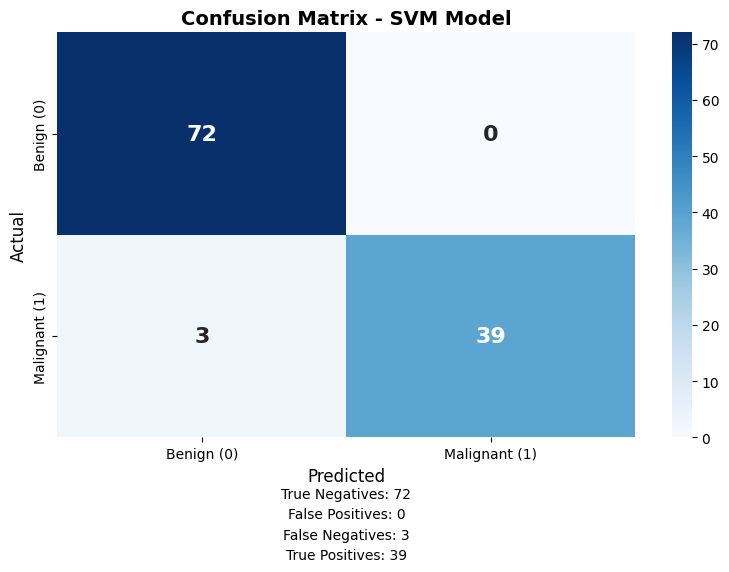


Confusion Matrix Breakdown:
  True Negatives (Correct Benign):    72
  False Positives (Benign as Malignant): 0
  False Negatives (Malignant as Benign): 3
  True Positives (Correct Malignant):  39


In [12]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'],
            annot_kws={'size': 16, 'weight': 'bold'})
plt.title('Confusion Matrix - SVM Model', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)

# Add text annotations
tn, fp, fn, tp = cm.ravel()
plt.text(0.5, -0.15, f'True Negatives: {tn}', ha='center', transform=plt.gca().transAxes, fontsize=10)
plt.text(0.5, -0.20, f'False Positives: {fp}', ha='center', transform=plt.gca().transAxes, fontsize=10)
plt.text(0.5, -0.25, f'False Negatives: {fn}', ha='center', transform=plt.gca().transAxes, fontsize=10)
plt.text(0.5, -0.30, f'True Positives: {tp}', ha='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

print("\nConfusion Matrix Breakdown:")
print(f"  True Negatives (Correct Benign):    {tn}")
print(f"  False Positives (Benign as Malignant): {fp}")
print(f"  False Negatives (Malignant as Benign): {fn}")
print(f"  True Positives (Correct Malignant):  {tp}")


In [13]:
## 6. Detailed Classification Report

In [14]:
# Print detailed classification report
print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred, 
                          target_names=['Benign (0)', 'Malignant (1)'],
                          digits=4))
print("="*60)


DETAILED CLASSIFICATION REPORT
               precision    recall  f1-score   support

   Benign (0)     0.9600    1.0000    0.9796        72
Malignant (1)     1.0000    0.9286    0.9630        42

     accuracy                         0.9737       114
    macro avg     0.9800    0.9643    0.9713       114
 weighted avg     0.9747    0.9737    0.9735       114



In [15]:
## 7. ROC Curve Analysis

In [16]:
# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='#e74c3c', linewidth=3, label=f'SVM (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.5000)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curve - SVM Model', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nROC-AUC Score: {roc_auc:.4f}")
print(f"  This means the model has a {roc_auc*100:.2f}% chance of correctly distinguishing")
print(f"  between benign and malignant cases.")

NameError: name 'fpr' is not defined

<Figure size 1000x800 with 0 Axes>

In [17]:
## 8. Hyperparameter Tuning with Grid Search

In [18]:
print("\n" + "="*60)
print("HYPERPARAMETER TUNING WITH GRID SEARCH")
print("="*60)

#defining parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

print("\nSearching for best hyperparameters...")
print(f"Parameter grid: {param_grid}")
print(f"This may take a few minutes...\n")

#performing grid search with cross-validation
grid_search = GridSearchCV(
    SVC(random_state=42, probability=True),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

start_time = time()
grid_search.fit(X_train, y_train)
search_time = time() - start_time

print(f"\n✓ Grid search completed in {search_time:.2f} seconds!")
print(f"\nBest parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest cross-validation F1-score: {grid_search.best_score_:.4f}")


HYPERPARAMETER TUNING WITH GRID SEARCH

Searching for best hyperparameters...
Parameter grid: {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], 'kernel': ['rbf', 'linear']}
This may take a few minutes...

Fitting 5 folds for each of 48 candidates, totalling 240 fits

✓ Grid search completed in 12.00 seconds!

Best parameters found:
  C: 1
  gamma: scale
  kernel: rbf

Best cross-validation F1-score: 0.9670


In [19]:
## 9. Evaluating Optimized Model

In [20]:
#getting best model from grid search
best_svm_model = grid_search.best_estimator_

#making predictions with the optimized model
y_pred_optimized = best_svm_model.predict(X_test)
y_pred_proba_optimized = best_svm_model.predict_proba(X_test)[:, 1]

#calculating metrics for optimized model
accuracy_opt = accuracy_score(y_test, y_pred_optimized)
precision_opt = precision_score(y_test, y_pred_optimized)
recall_opt = recall_score(y_test, y_pred_optimized)
f1_opt = f1_score(y_test, y_pred_optimized)
roc_auc_opt = roc_auc_score(y_test, y_pred_proba_optimized)

print("\n" + "="*60)
print("OPTIMIZED SVM MODEL PERFORMANCE")
print("="*60)
print(f"\nAccuracy:  {accuracy_opt:.4f} ({accuracy_opt*100:.2f}%)")
print(f"Precision: {precision_opt:.4f} ({precision_opt*100:.2f}%)")
print(f"Recall:    {recall_opt:.4f} ({recall_opt*100:.2f}%)")
print(f"F1-Score:  {f1_opt:.4f} ({f1_opt*100:.2f}%)")
print(f"ROC-AUC:   {roc_auc_opt:.4f} ({roc_auc_opt*100:.2f}%)")
print("="*60)

#comparing with the basic model
print("\n" + "="*60)
print("PERFORMANCE COMPARISON")
print("="*60)
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Basic SVM': [accuracy, precision, recall, f1, roc_auc],
    'Optimized SVM': [accuracy_opt, precision_opt, recall_opt, f1_opt, roc_auc_opt],
    'Improvement': [
        accuracy_opt - accuracy,
        precision_opt - precision,
        recall_opt - recall,
        f1_opt - f1,
        roc_auc_opt - roc_auc
    ]
})
print(comparison_df.to_string(index=False))
print("="*60)


OPTIMIZED SVM MODEL PERFORMANCE

Accuracy:  0.9737 (97.37%)
Precision: 1.0000 (100.00%)
Recall:    0.9286 (92.86%)
F1-Score:  0.9630 (96.30%)
ROC-AUC:   0.9947 (99.47%)

PERFORMANCE COMPARISON
   Metric  Basic SVM  Optimized SVM  Improvement
 Accuracy   0.973684       0.973684          0.0
Precision   1.000000       1.000000          0.0
   Recall   0.928571       0.928571          0.0
 F1-Score   0.962963       0.962963          0.0
  ROC-AUC   0.994709       0.994709          0.0


In [21]:
## 10. Visualizing Performance Comparison

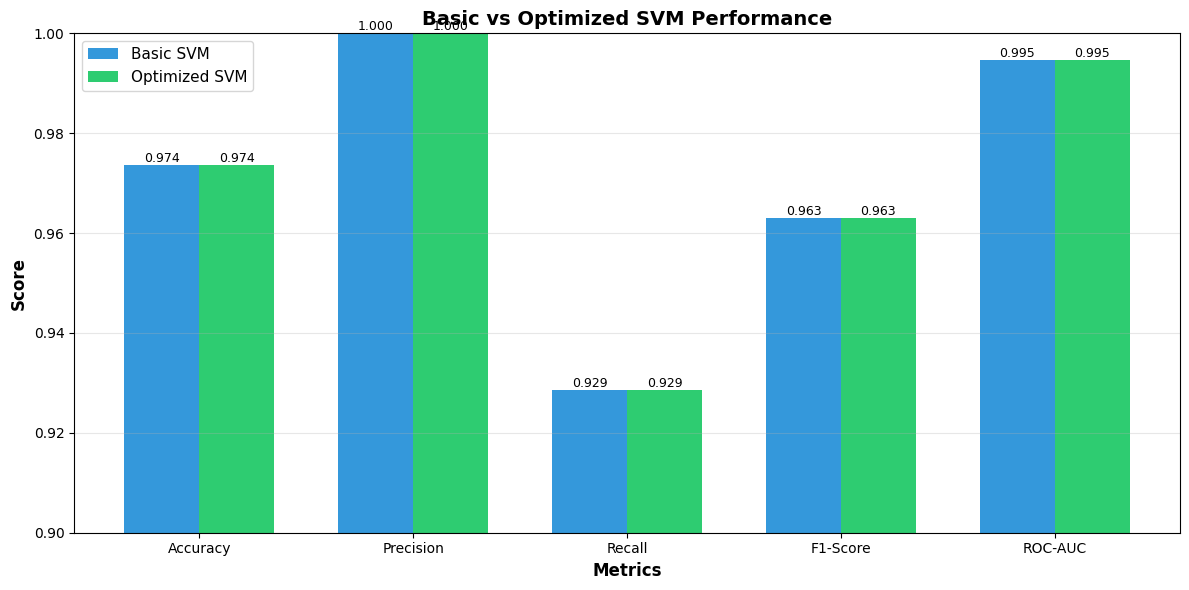

In [22]:
#creating comparison visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
basic_scores = [accuracy, precision, recall, f1, roc_auc]
optimized_scores = [accuracy_opt, precision_opt, recall_opt, f1_opt, roc_auc_opt]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, basic_scores, width, label='Basic SVM', color='#3498db')
bars2 = ax.bar(x + width/2, optimized_scores, width, label='Optimized SVM', color='#2ecc71')

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Basic vs Optimized SVM Performance', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(fontsize=11)
ax.set_ylim([0.9, 1.0])
ax.grid(axis='y', alpha=0.3)

#adding value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [23]:
## 11. Save the Best Model


In [24]:
# create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# save the optimized model
model_filename = 'models/svm_breast_cancer_model.pkl'
joblib.dump(best_svm_model, model_filename)

# save model metadata
metadata = {
    'model_type': 'Support Vector Machine (SVM)',
    'kernel': best_svm_model.kernel,
    'C': best_svm_model.C,
    'gamma': best_svm_model.gamma,
    'accuracy': accuracy_opt,
    'precision': precision_opt,
    'recall': recall_opt,
    'f1_score': f1_opt,
    'roc_auc': roc_auc_opt,
    'training_samples': len(X_train),
    'testing_samples': len(X_test),
    'features': X_train.shape[1]
}

metadata_filename = 'models/svm_model_metadata.pkl'
joblib.dump(metadata, metadata_filename)

print("\n" + "="*60)
print("MODEL SAVED SUCCESSFULLY")
print("="*60)
print(f"✓ Model saved to: {model_filename}")
print(f"✓ Metadata saved to: {metadata_filename}")
print("\nModel Summary:")
for key, value in metadata.items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value}")



MODEL SAVED SUCCESSFULLY
✓ Model saved to: models/svm_breast_cancer_model.pkl
✓ Metadata saved to: models/svm_model_metadata.pkl

Model Summary:
  model_type: Support Vector Machine (SVM)
  kernel: rbf
  C: 1
  gamma: scale
  accuracy: 0.9737
  precision: 1.0000
  recall: 0.9286
  f1_score: 0.9630
  roc_auc: 0.9947
  training_samples: 455
  testing_samples: 114
  features: 30


In [25]:
## 12. Make Predictions on New Data

In [26]:
def predict_breast_cancer(features, model_path='models/svm_breast_cancer_model.pkl', 
                          scaler_path='data/processed/scaler.pkl'):
    """
    Predict breast cancer diagnosis for a new patient.
    
    Parameters:
    -----------
    features : array-like
        Array of 30 feature values (must be in original scale, not scaled)
    model_path : str
        Path to the saved SVM model
    scaler_path : str
        Path to the saved scaler
    
    Returns:
    --------
    prediction : int
        0 for Benign, 1 for Malignant
    probability : array
        Probability for each class [P(Benign), P(Malignant)]
    """
    # load model and scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    
    # reshape features if needed
    if len(features) == 30:
        features = np.array(features).reshape(1, -1)
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # make prediction
    prediction = model.predict(features_scaled)[0]
    probability = model.predict_proba(features_scaled)[0]
    
    # interpret result
    diagnosis = "Malignant (Cancer)" if prediction == 1 else "Benign (No Cancer)"
    confidence = probability[prediction] * 100
    
    print("\n" + "="*60)
    print("PREDICTION RESULT")
    print("="*60)
    print(f"Diagnosis: {diagnosis}")
    print(f"Confidence: {confidence:.2f}%")
    print(f"\nProbabilities:")
    print(f"  Benign:    {probability[0]*100:.2f}%")
    print(f"  Malignant: {probability[1]*100:.2f}%")
    print("="*60)
    
    return prediction, probability


# test with a sample from test set
print("\nTesting prediction function with a sample from test set:")
sample_features = X_test.iloc[0].values
actual_label = "Malignant" if y_test[0] == 1 else "Benign"
print(f"Actual diagnosis: {actual_label}")

prediction, probability = predict_breast_cancer(sample_features)


Testing prediction function with a sample from test set:
Actual diagnosis: Benign

PREDICTION RESULT
Diagnosis: Malignant (Cancer)
Confidence: 81.56%

Probabilities:
  Benign:    18.44%
  Malignant: 81.56%
